### Classify application accepted or not using Logistic regression Using Statsmodels

#### Importing the Dataset 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.formula.api as smf  
from sklearn.preprocessing import LabelEncoder 

#### Importing the Dataset 

In [2]:
data = pd.read_csv('F://Data_Set/creditcard.csv') 

In [3]:
data.head() 

,Unnamed: 0,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Drop Unwanted Colum for the dataset 

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True) 

Shape of the Dataset 

In [5]:
data.shape 

(1319, 12)

In [6]:
data.head() 

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


Check any Null Value Present in the Dataset or Not 

In [7]:
data.isnull().sum() 

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

Dataset Information 

In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


Check the Correlation in the Dataset 

In [9]:
data.corr() 

,reports,age,income,share,expenditure,dependents,months,majorcards,active
reports,1.000000,0.044089,0.011023,-0.159011,-0.136538,0.019731,0.048968,-0.007304,0.207755
age,0.044089,1.000000,0.324653,-0.115697,0.014948,0.212146,0.436426,0.009777,0.181070
income,0.011023,0.324653,1.000000,-0.054429,0.281104,0.317601,0.130346,0.107138,0.180540
share,-0.159011,-0.115697,-0.054429,1.000000,0.838779,-0.082618,-0.055348,0.051470,-0.023474
expenditure,-0.136538,0.014948,0.281104,0.838779,1.000000,0.052664,-0.029007,0.077514,0.054724
dependents,0.019731,0.212146,0.317601,-0.082618,0.052664,1.000000,0.046512,0.010285,0.107133
months,0.048968,0.436426,0.130346,-0.055348,-0.029007,0.046512,1.000000,-0.041447,0.100028
majorcards,-0.007304,0.009777,0.107138,0.051470,0.077514,0.010285,-0.041447,1.000000,0.119603
active,0.207755,0.181070,0.180540,-0.023474,0.054724,0.107133,0.100028,0.119603,1.000000


#### Visualize the Given Dataset 

Graphical Representation of owner Column Using Histogram

(array([581.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 738.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

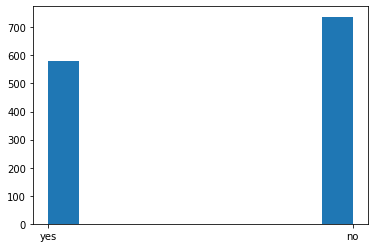

In [11]:
plt.hist(data['owner']) 

Graphical Representation of selfemp Column Using Histogram

(array([1228.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          91.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

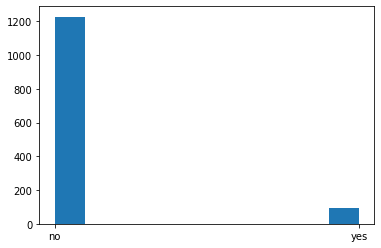

In [12]:
plt.hist(data['selfemp'])

#### Chek any Outlier Present in the Dataset or Not by Using BoxPlot 

In [13]:
data.head(2)

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.52,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.42,0.005217,9.854167,no,no,3,34,1,13


Boxplot of reports Column 

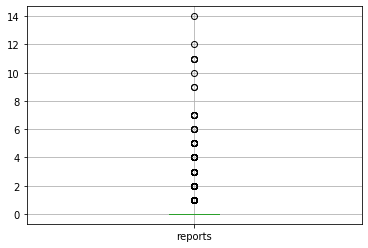

In [14]:
data.boxplot(column='reports') 

BoxPlot of age Column 

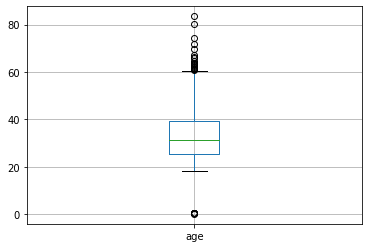

In [15]:
data.boxplot(column='age') 

BoxPlot of income Column

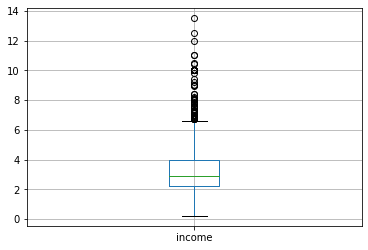

In [16]:
data.boxplot(column='income') 

BoxPlot of share Column

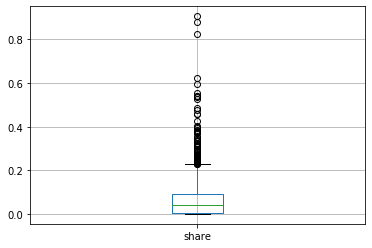

In [18]:
data.boxplot(column='share') 

BoxPlot of expenditure Column 

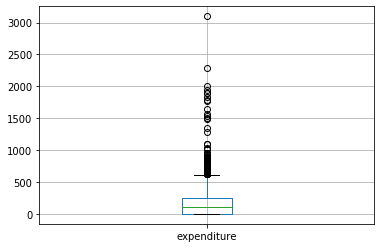

In [20]:
data.boxplot(column='expenditure')  

In [ ]:
BoxPlot of dependents Column

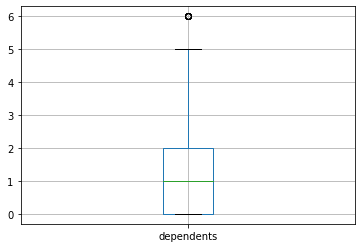

In [21]:
data.boxplot(column='dependents')   

#### Divide the Dataset into Dependet and Independent Variable 

Independent Variable 

In [10]:
x = data.drop(['card'],axis='columns')  

Convert Categorical Column owner and Selfemp in to Numerical 

In [11]:
le_owner = LabelEncoder() 

In [12]:
x['owner_n'] = le_owner.fit_transform(x['owner']) 

In [13]:
le_selfemp = LabelEncoder() 

In [14]:
x['selfemp_n'] = le_selfemp.fit_transform(x['selfemp']) 

Drop Unwanted Categorical Column X from the Independent Variable x 

In [15]:
x_n = x.drop(['owner','selfemp'],axis='columns')   

In [16]:
x_n 

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_n,selfemp_n
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,0,94,1,19,1,0
1315,5,23.91667,3.1920,0.000376,0.000000,3,12,1,5,0,0
1316,0,40.58333,4.6000,0.026513,101.298300,2,1,1,2,1,0
1317,0,32.83333,3.7000,0.008999,26.996670,0,60,1,7,0,1


Dependent Variable 

In [17]:
y = data.iloc[:,0].values 

Convert the Categorical Dependent Variable In to Numerical form 

In [18]:
le = LabelEncoder() 

In [19]:
y = le.fit_transform(y) 

#### Applay the Logistic Regression algorithm on the Dataset 

In [20]:
from sklearn.linear_model import LogisticRegression 

In [21]:
classifier = LogisticRegression() 

Train the Model 

In [22]:
classifier.fit(x_n,y)  

C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict the Result

In [23]:
y_pred = classifier.predict(x_n) 

In [24]:
y_pred 

array([1, 1, 1, ..., 1, 1, 1])

In [25]:
y_pred_df = pd.DataFrame({'actual':y,'Predicted_values':classifier.predict(x_n)}) 

In [26]:
y_pred_df 

,actual,Predicted_values
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
1314,1,1
1315,0,0
1316,1,1
1317,1,1


#### Confusion Matrix of the Model 

In [27]:
from sklearn.metrics import confusion_matrix 

In [28]:
cm = confusion_matrix(y,y_pred) 

In [29]:
cm 

array([[ 295,    1],
       [  23, 1000]], dtype=int64)

#### Accuracy of the Model 

In [30]:
from sklearn.metrics import accuracy_score 

In [31]:
ac = accuracy_score(y,y_pred) 

In [32]:
ac 

0.9818043972706596

In [42]:
classifier.predict_proba(x_n)[:,1]     

array([1.        , 0.99999872, 1.        , ..., 1.        , 1.        ,
       1.        ])

#### ROC Curve 

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 

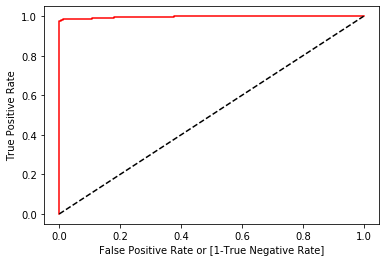

In [41]:
fpr, tpr, threshold = roc_curve(y,classifier.predict_proba(x_n)[:,1])  
auc = roc_auc_score(y,y_pred) 

plt.plot(fpr,tpr,color='red',label='logit model (area = #0.2f)'%auc)
plt.plot([0,1],[0,1],'k--') 
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() 

### 2nd Model Genration by Standardizing the Dataset 

In [77]:
x11 = x_n

In [78]:
y1 = y 

#### Split the dataset into traning set and test set 

In [80]:
from sklearn.model_selection import train_test_split 

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x11,y1,test_size=0.2,random_state=1) 

#### Genrate the 2nd Logestic Regression Model 

In [81]:
model_1 = LogisticRegression(random_state=0) 

Train the Model 

In [82]:
model_1.fit(x_train,y_train) 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict the test set Result 

In [83]:
y1_pred = model_1.predict(x_test) 

In [84]:
y1_pred 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [85]:
y1_pred_df = pd.DataFrame({'actual':y_test,'Predicted_values':y1_pred})  

In [86]:
y1_pred_df 

,actual,Predicted_values
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
259,1,1
260,1,1
261,1,1
262,1,1


#### Confusion Matrix of 2nd Model 

In [87]:
cm1 = confusion_matrix(y_test,y1_pred) 

In [88]:
cm1 

array([[ 66,   0],
       [  3, 195]], dtype=int64)

#### Accuracy of the 2nd Model 

In [89]:
ac1 = accuracy_score(y_test,y1_pred) 

In [90]:
ac1 

0.9886363636363636

#### Visualizing the Traning Set Result of 2nd Model 

In [60]:
from matplotlib.colors import ListedColormap 

In [93]:
dataset_1 = data 

In [94]:
dataset_1.head() 

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


#### Divide the Dataset in to Dependent and Independent Variables 

In [95]:
x1 = dataset_1.iloc[:,1:].values 

In [96]:
y1 = dataset_1.iloc[:,0].values 

#### Converting Categorical Data in to Numerical form in Independent Variable 

In [98]:
le_own = LabelEncoder()  

In [101]:
x1[:,5] = le_own.fit_transform(x1[:,5])   

In [104]:
le_self = LabelEncoder()   

In [105]:
x1[:,6] = le_self.fit_transform(x1[:,5]) 

#### Converting Categorical Data in to Numerical form of Dependent Variable 

In [107]:
le_card = LabelEncoder()  

In [108]:
y1 = le_card.fit_transform(y1) 

#### Dividing the Dataset in to traning set and testing set 

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.2,random_state=1) 

#### Genrate the 2nd Logestic Regression Model 

In [111]:
model_1 = LogisticRegression(random_state=0) 

Train the Model 

In [112]:
model_1.fit(x_train,y_train) 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predict the test set Result 

In [113]:
y1_pred = model_1.predict(x_test) 

In [114]:
y1_pred 

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])